In [1]:
# Import libraries and define functions
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import numpy as np
import os
# function for Root Mean Square of Successive Differences (RMSSD)
def RMSSD_Calc(path,column,frame_interval):
    df = pd.read_csv(path) # read csv file
    df_sorted = df.sort_values(column).convert_dtypes().reset_index() # sort values
    df_sorted[column]=df_sorted[column]*frame_interval # convert to seconds
    N = df_sorted.shape[0] # number of rows 
    RMSSD=math.sqrt((df_sorted[column].diff().diff().dropna().sum()**2)/(N-1))# RMSSD calculation
    return RMSSD # return RMSSD value

RMSSD= 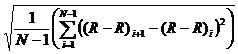

In [2]:
path="C:/AcquiferResults/Heartbeat/Heartbeat_Maxima/" # define path
listDir=os.listdir(path) # list all files in path
RMSSD=[RMSSD_Calc(path+i,"Y",33) for i in listDir] # calculate RMSSD for all files in path

In [ ]:
Series_listDir=pd.Series(listDir) # convert list to series for listDir
Series_RMSSD=pd.Series(RMSSD) # convert list to series for RMSSD
df_results=pd.concat([Series_listDir,Series_RMSSD],axis=1).rename(columns={0:"Filename",1:"RMSSD"}) # create dataframe for results
df_results["Well"]=df_results["Filename"].str.split("__",expand=True)[1].str.replace(".csv","") # extract well name
df_results # show dataframe

In [4]:
wells = pd.read_csv("C:/AcquiferResults/Heartbeat/result_heartbeat_B.csv", sep=";") # read csv file
wells_dropna = wells.dropna() # drop rows with NaN values
wells_gen = wells_dropna.drop(columns=wells_dropna.columns[0:3]) # drop the first three columns which have no use
wells_gen_dict=wells_gen.set_index("well").to_dict()["gen."]  # create dictionary with well name as key and gen as value
def assign_gen(well): # function to assign gen to well
    gen=wells_gen_dict.get(well) # get gen from dictionary
    return gen # return gen

In [5]:
df_results["gen."]=df_results["Well"].apply(assign_gen) # apply function to dataframe
df_results # show dataframe
df_results.to_csv("nrs_rmssd.csv") # save dataframe as csv file